In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as patches

In [2]:
df = pd.read_csv("Sample_Game_3_tracking.txt", sep=":", header=None, index_col=0)

In [3]:
df.head()

,1,2
0,,
1,"0.84722,0.52855;0.65268,0.24792;0.66525,0.4656...","NaN,NaN"
2,"0.84722,0.52855;0.65231,0.24513;0.66482,0.4654...","NaN,NaN"
3,"0.84722,0.52855;0.65197,0.24387;0.66467,0.4653...","NaN,NaN"
4,"0.84722,0.52855;0.65166,0.24288;0.66460,0.4648...","NaN,NaN"
5,"0.84722,0.52855;0.65141,0.24251;0.66452,0.4646...","NaN,NaN"


In [4]:
for i, col in enumerate(df.columns):
    # Split by ";"
    temp_df = df[col].str.split(';', expand=True)
    temp_df.columns = [f'{col}{j}_semicolon' for j in range(temp_df.shape[1])]
    df = pd.concat([df, temp_df], axis=1)
    df = df.drop(col, axis=1)
    # Split by ","
    for subcol in temp_df.columns:
        if df[subcol].dtype == 'object':  # Only split string columns
            temp_df2 = df[subcol].str.split(',', expand=True)
            temp_df2.columns = [f'{subcol}{k}_comma' for k in range(temp_df2.shape[1])]
            df = pd.concat([df, temp_df2], axis=1)
            df = df.drop(subcol, axis=1)

In [5]:
df.head()

,10_semicolon0_comma,10_semicolon1_comma,11_semicolon0_comma,11_semicolon1_comma,12_semicolon0_comma,12_semicolon1_comma,13_semicolon0_comma,13_semicolon1_comma,14_semicolon0_comma,14_semicolon1_comma,...,118_semicolon0_comma,118_semicolon1_comma,119_semicolon0_comma,119_semicolon1_comma,120_semicolon0_comma,120_semicolon1_comma,121_semicolon0_comma,121_semicolon1_comma,20_semicolon0_comma,20_semicolon1_comma
0,,,,,,,,,,,,,,,,,,,,,
1,0.84722,0.52855,0.65268,0.24792,0.66525,0.46562,0.68103,0.59083,0.62405,0.80669,...,0.41787,0.48086,0.41215,0.36689,0.47050,0.73219,0.48864,0.36357,NaN,NaN
2,0.84722,0.52855,0.65231,0.24513,0.66482,0.46548,0.68095,0.59054,0.62371,0.80594,...,0.41719,0.47864,0.41132,0.36169,0.47040,0.73204,0.48834,0.36362,NaN,NaN
3,0.84722,0.52855,0.65197,0.24387,0.66467,0.46537,0.68078,0.59035,0.62354,0.80601,...,0.41697,0.47824,0.41131,0.36072,0.47075,0.73229,0.48814,0.36372,NaN,NaN
4,0.84722,0.52855,0.65166,0.24288,0.66460,0.46488,0.68063,0.58987,0.62318,0.80604,...,0.41685,0.47815,0.41117,0.35930,0.47118,0.73266,0.48793,0.36278,NaN,NaN
5,0.84722,0.52855,0.65141,0.24251,0.66452,0.46469,0.68052,0.58934,0.62286,0.80626,...,0.41669,0.47749,0.41120,0.35910,0.47163,0.73287,0.48784,0.36240,NaN,NaN


In [6]:
head = "P_1-x"
headers = [head]
for i in range(1, df.shape[1]):
    if "x" in headers[i-1]:
        head = f"P_{(i//2)+1}-y"
    else:
        head = f"P_{(i//2)+1}-x"
    headers.append(head)

df.columns = headers

In [7]:
df.tail()

,P_1-x,P_1-y,P_2-x,P_2-y,P_3-x,P_3-y,P_4-x,P_4-y,P_5-x,P_5-y,...,P_19-x,P_19-y,P_20-x,P_20-y,P_21-x,P_21-y,P_22-x,P_22-y,P_23-x,P_23-y
0,,,,,,,,,,,,,,,,,,,,,
143757,0.11993,0.51783,0.47808,0.45408,0.49691,0.77311,0.46373,0.62102,0.50927,0.27457,...,0.58877,0.56936,0.50218,0.65158,0.46978,0.62349,0.80792,0.27106,NaN,NaN
143758,0.11993,0.51783,0.47786,0.45521,0.49701,0.77429,0.46381,0.62046,0.50913,0.27654,...,0.58787,0.56961,0.50180,0.65115,0.46970,0.62403,0.80712,0.27184,NaN,NaN
143759,0.11993,0.51783,0.47743,0.45709,0.49686,0.77555,0.46358,0.62117,0.50876,0.27762,...,0.58668,0.57038,0.50116,0.65071,0.46929,0.62479,0.80582,0.27242,NaN,NaN
143760,0.11993,0.51783,0.47669,0.45947,0.49676,0.77638,0.46306,0.62339,0.50808,0.27935,...,0.58525,0.57033,0.50031,0.65134,0.46866,0.62611,0.80444,0.27260,NaN,NaN
143761,0.11993,0.51783,0.47641,0.46499,0.49671,0.78117,0.46197,0.62621,0.50715,0.27901,...,0.58358,0.57224,0.49928,0.65304,0.46929,0.63157,0.80212,0.27596,NaN,NaN


## You'll see the data goes from 0 to 1 on each axis. The coordiante (0,0) is the top left, (1,1) is the bottom right, and (0.5,0.5) is the kick off point.

In [8]:
x = df["P_1-x"].values.tolist()
y = df["P_1-y"].values.tolist()

In [9]:
def create_pitch_element(ax, element_type, *args, **kwargs):
    element = element_type(*args, **kwargs)
    ax.add_patch(element)
    return element

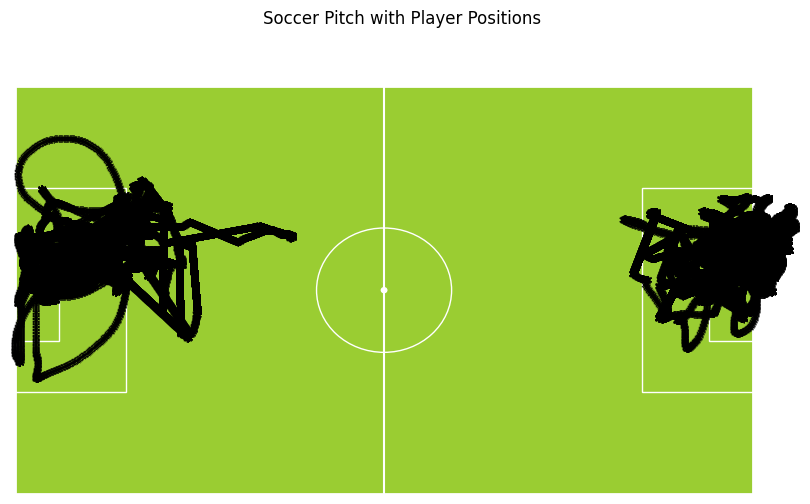

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, 106)
ax.set_ylim(0, 68)
ax.axis('off')

# Pitch elements
create_pitch_element(ax, patches.Rectangle, (0, 0), 106, 68, linewidth=2, edgecolor='white', facecolor='yellowgreen')
ax.plot([50, 50], [0, 60], color='white')  # Halfway line
create_pitch_element(ax, patches.Rectangle, (0, 15), 15, 30, linewidth=1, edgecolor='white', facecolor='none')  # Left Penalty Area
create_pitch_element(ax, patches.Rectangle, (85, 15), 15, 30, linewidth=1, edgecolor='white', facecolor='none')  # Right Penalty Area
create_pitch_element(ax, patches.Rectangle, (0, 22.5), 6, 15, linewidth=1, edgecolor='white', facecolor='none')  # Left 6-yard Box
create_pitch_element(ax, patches.Rectangle, (94, 22.5), 6, 15, linewidth=1, edgecolor='white', facecolor='none')  # Right 6-yard Box
create_pitch_element(ax, patches.Circle, (50, 30), 9.15, linewidth=1, edgecolor='white', facecolor='none')  # Center Circle
create_pitch_element(ax, patches.Circle, (50, 30), 0.37, color='white')  # Center Spot

# Prepare player positions and their coordinates on the pitch
positions_x = [float(i) * 105 for i in x]
positions_y = [float(i) * 68 for i in y]
player_names = ["GK", "LB", "CB", "CB", "RB", "CM", "DM", "CM", "LW", "ST", "RW", "GK", "LB", "CB", "CB", "RB", "CM", "DM", "CM", "LW", "ST", "RW"]

# Annotate player names
for i, (x, y) in enumerate(zip(positions_x, positions_y)):
    color = 'black' #if i < 11 else 'red'
    ax.text(x, y, s="*", ha='center', va='center', fontsize=3, color=color)

# plt.grid(True)
plt.title('Soccer Pitch with Player Positions')
plt.show()